In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# ---------------------------
# Load books
# ---------------------------

def load_book(path):
    with open(path, "r", encoding="utf-8") as f:
        return f.read()

pet = load_book(r"C:\Users\dhima\Documents\NLP\NPL_Project\the_books\PetSematary_updated.txt")
shine = load_book(r"C:\Users\dhima\Documents\NLP\NPL_Project\the_books\TheShining_updated.txt")

books = {
    "Pet Sematary": pet,
    "The Shining": shine
}

# ---------------------------
# Sensory lexicon
# ---------------------------

sensory_words = {
    "sight": ["see", "glimpse", "look", "shadow", "dark", "light"],
    "sound": ["hear", "whisper", "scream", "echo", "noise"],
    "smell": ["smell", "odor", "stench", "fragrance"],
    "touch": ["touch", "cold", "warm", "rough", "smooth"],
    "taste": ["taste", "bitter", "sweet", "salty"]
}

# ---------------------------
# Count sensory word frequencies
# ---------------------------

def count_sensory(text):
    counts = {}
    tokens = re.findall(r"\w+", text.lower())
    token_counts = Counter(tokens)
    for sense, words in sensory_words.items():
        counts[sense] = sum(token_counts[w] for w in words)
    return counts

freqs = {title: count_sensory(text) for title, text in books.items()}

freqs
# ---------------------------
# KWIC (keyword in context)
# ---------------------------

def kwic(text, keyword, window=50):
    pattern = rf".{{0,{window}}}\b{keyword}\b.{{0,{window}}}"
    return re.findall(pattern, text, flags=re.IGNORECASE)

fear_terms = ["fear", "terror", "scared"]

kwic_results = {
    title: {term: kwic(text, term) for term in fear_terms}
    for title, text in books.items()
}

kwic_results
# Example: show 10 KWIC samples for "fear" in Pet Sematary
kwic_results["Pet Sematary"]["fear"][:10]
# ---------------------------
# Metaphor extraction (X is a Y)
# ---------------------------

def extract_is_a(text):
    return re.findall(r"\b(\w+)\s+is\s+a\s+(\w+)\b", text, re.IGNORECASE)

metaphors = {
    title: extract_is_a(text)
    for title, text in books.items()
}

metaphors
# Example: show metaphors from The Shining
metaphors["The Shining"][:20]


[('guy', 'real'),
 ('Shockley', 'powerful'),
 ('There', 'snowmobile'),
 ('It', 'great'),
 ('Shit', 'vulgar'),
 ('This', 'serious'),
 ('there', 'dumb'),
 ('Florida', 'dump'),
 ('behavior', 'pretty'),
 ('son', 'little'),
 ('Battaglia', 'close'),
 ('selfpity', 'luxury'),
 ('Why', 'raven'),
 ('that', 'new'),
 ('husband', 'drunk'),
 ('dream', 'standard'),
 ('Why', 'raven'),
 ('park', 'priority'),
 ('Danny', 'talented'),
 ('Everything', 'lie')]

## this is the 2nd one after i asked chatgpt


Pet Sematary sensory counts: {'sight': 779, 'sound': 212, 'smell': 54, 'taste': 40, 'touch': 255}
The Shining sensory counts: {'sight': 821, 'sound': 235, 'smell': 63, 'taste': 66, 'touch': 317}


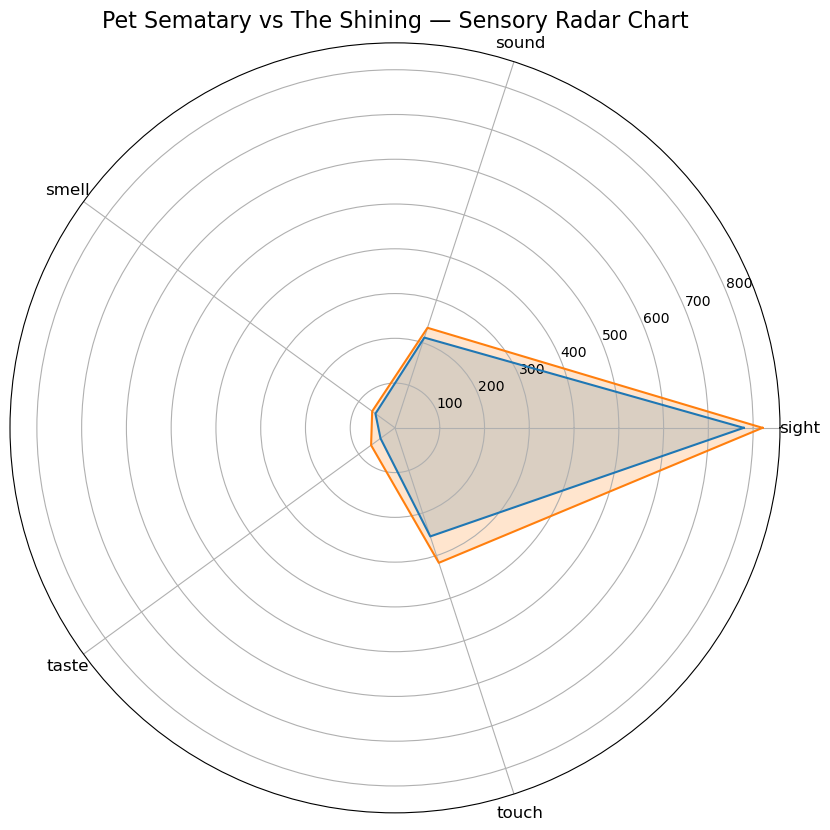

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# FILE PATHS
# ----------------------------
base_path = r"C:\Users\dhima\Documents\NLP\NPL_Project\the_books"
pet_path = os.path.join(base_path, "PetSematary_updated.txt")
shining_path = os.path.join(base_path, "TheShining_updated.txt")

# ----------------------------
# LOAD TEXT
# ----------------------------
def load_text(fp):
    with open(fp, "r", encoding="utf-8", errors="ignore") as f:
        return f.read().lower()

pet_text = load_text(pet_path)
shining_text = load_text(shining_path)

# ----------------------------
# SENSORY WORD DICTIONARIES
# ----------------------------
senses = {
    "sight": ["see", "look", "vision", "dark", "light", "shadow", "bright", "glow", "eyes", "color"],
    "sound": ["hear", "heard", "scream", "whisper", "bang", "echo", "noise", "cry", "shout"],
    "smell": ["smell", "odor", "scent", "stench", "fragrance"],
    "taste": ["taste", "bitter", "sweet", "salty", "sour"],
    "touch": ["cold", "warm", "hot", "rough", "smooth", "soft", "hard", "press", "grab", "touch"]
}

# ----------------------------
# COUNT SENSORY WORDS
# ----------------------------
def count_sensory_words(text, senses_dict):
    counts = {}
    for sense, wordlist in senses_dict.items():
        total = 0
        for w in wordlist:
            total += len(re.findall(r"\b" + re.escape(w) + r"\b", text))
        counts[sense] = total
    return counts

pet_counts = count_sensory_words(pet_text, senses)
shining_counts = count_sensory_words(shining_text, senses)

print("Pet Sematary sensory counts:", pet_counts)
print("The Shining sensory counts:", shining_counts)

# ----------------------------
# RADAR CHART FUNCTION
# ----------------------------
def radar_chart(data1, data2, labels, title1, title2, color1="#1f77b4", color2="#ff7f0e"):
    categories = list(data1.keys())
    values1 = list(data1.values())
    values2 = list(data2.values())

    values1 += values1[:1]
    values2 += values2[:1]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], categories, fontsize=12)

    ax.plot(angles, values1, color=color1, linewidth=2, label=title1)
    ax.fill(angles, values1, color=color1, alpha=0.25)

    ax.plot(angles, values2, color=color2, linewidth=2, label=title2)
    ax.fill(angles, values2, color=color2, alpha=0.25)

    plt.title(f"{title1} vs {title2} — Sensory Radar Chart", size=16)
    ax.legend(loc='upper right')
    plt.show()

# ----------------------------
# PLOT RADAR CHART
# ----------------------------
radar_chart(
    pet_counts,
    shining_counts,
    list(senses.keys()),
    "Pet Sematary",
    "The Shining",
    color1="#1f77b4",
    color2="#ff7f0e"
)

## i think this is the final version from chatgpt


Pet Sematary: {'sight': 779, 'sound': 212, 'smell': 54, 'taste': 40, 'touch': 255}
The Shining: {'sight': 821, 'sound': 235, 'smell': 63, 'taste': 66, 'touch': 317}


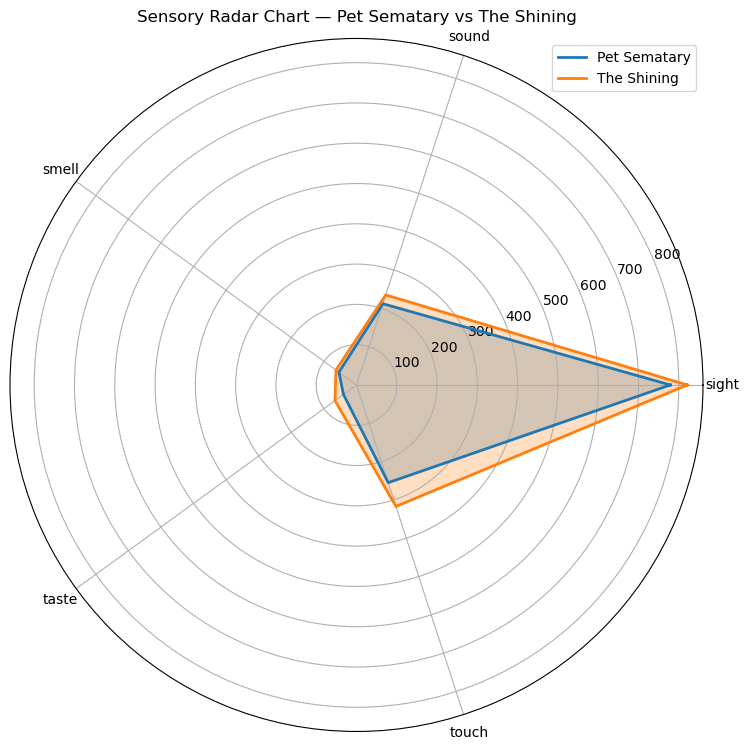


Metaphors — Pet Sematary (first 10):
 []

Metaphors — The Shining (first 10):
 []

KWIC — Pet Sematary (first 5):
 ['had been easy around the appearances of death (not, he supposed, that anyone really w', 'ved violent lives and often died bloody deaths, always just below the usual range of ', 'hroom and vomit. violent lives, violent deaths. a dog got them and ripped them open i', 'r the first time examining the facts of death. ‘i mean,’ he said, ‘church is only thr', 'lie wept for the very intractability of death, its imperviousness to argument or to a']

KWIC — The Shining (first 5):
 ['                 "the masque of the red death"    the sleep of reason breeds monsters', '. he felt awful. this was what oncoming death felt like. then she fled for the teleph', "him to change the verdict to accidental death. heart attack. now ole archer's driving", 'ed. high voltage. third rail. danger of death. keep off. keep out. no trespassing. vi', 't over the rain gutter and down to your death on

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# LOAD BOOKS
# --------------------------------------------------

base_path = r"C:\Users\dhima\Documents\NLP\NPL_Project\the_books"

pet_text = open(os.path.join(base_path, "PetSematary_updated.txt"), "r", encoding="utf-8", errors="ignore").read().lower()
shining_text = open(os.path.join(base_path, "TheShining_updated.txt"), "r", encoding="utf-8", errors="ignore").read().lower()

books = {
    "Pet Sematary": pet_text,
    "The Shining": shining_text
}

# --------------------------------------------------
# SENSORY WORD LISTS
# --------------------------------------------------

senses = {
    "sight": ["see", "look", "vision", "dark", "light", "shadow", "bright", "glow", "eyes", "color"],
    "sound": ["hear", "heard", "scream", "whisper", "bang", "echo", "noise", "cry", "shout"],
    "smell": ["smell", "odor", "scent", "stench", "fragrance"],
    "taste": ["taste", "bitter", "sweet", "salty", "sour"],
    "touch": ["cold", "warm", "hot", "rough", "smooth", "soft", "hard", "press", "grab", "touch"]
}

# --------------------------------------------------
# COUNT SENSORY WORDS
# --------------------------------------------------

def count_sensory(text, senses):
    counts = {}
    for sense, words in senses.items():
        total = 0
        for w in words:
            total += len(re.findall(r"\b" + re.escape(w) + r"\b", text))
        counts[sense] = total
    return counts

pet_counts = count_sensory(pet_text, senses)
shine_counts = count_sensory(shining_text, senses)

print("Pet Sematary:", pet_counts)
print("The Shining:", shine_counts)

# --------------------------------------------------
# RADAR CHART
# --------------------------------------------------

def radar_chart(d1, d2, labels, name1, name2, color1="#1f77b4", color2="#ff7f0e"):
    categories = list(d1.keys())
    v1 = list(d1.values())
    v2 = list(d2.values())

    v1 += v1[:1]
    v2 += v2[:1]

    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(9,9))
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], categories)

    ax.plot(angles, v1, color=color1, linewidth=2, label=name1)
    ax.fill(angles, v1, color=color1, alpha=0.25)

    ax.plot(angles, v2, color=color2, linewidth=2, label=name2)
    ax.fill(angles, v2, color=color2, alpha=0.25)

    plt.title(f"Sensory Radar Chart — {name1} vs {name2}")
    ax.legend(loc='upper right')
    plt.show()

radar_chart(pet_counts, shine_counts, list(senses.keys()), "Pet Sematary", "The Shining", color1="#1f77b4", color2="#ff7f0e")

# --------------------------------------------------
# METAPHOR EXTRACTION (simple pattern-based)
# --------------------------------------------------

# Common metaphor triggers
metaphor_patterns = [
    r"\\blike a [a-zA-Z]+\\b",
    r"\\bas a [a-zA-Z]+\\b",
    r"\\bis a [a-zA-Z]+\\b",
    r"\\bwas a [a-zA-Z]+\\b"
]

def extract_metaphors(text, patterns):
    metaphors = []
    for pat in patterns:
        matches = re.findall(r".{0,40}" + pat + r".{0,40}", text)
        metaphors.extend(matches)
    return metaphors

metaphors = {
    title: extract_metaphors(txt, metaphor_patterns)
    for title, txt in books.items()
}

print("\nMetaphors — Pet Sematary (first 10):\n", metaphors["Pet Sematary"][:10])
print("\nMetaphors — The Shining (first 10):\n", metaphors["The Shining"][:10])

# --------------------------------------------------
# KWIC FUNCTION (Keyword in Context)
# --------------------------------------------------

def kwic(text, keyword, window=40):
    text = text.replace("\n", " ")
    pattern = r".{0,%d}%s.{0,%d}" % (window, re.escape(keyword), window)
    return re.findall(pattern, text)

kwic_results = {
    "Pet Sematary": kwic(pet_text, "death", 40),
    "The Shining": kwic(shining_text, "death", 40)
}

print("\nKWIC — Pet Sematary (first 5):\n", kwic_results["Pet Sematary"][:5])
print("\nKWIC — The Shining (first 5):\n", kwic_results["The Shining"][:5])